# Models Trained on Tumor Images Only

In [1]:
# import necessary libraries
import numpy as np
from torch import nn
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from IPython.display import display
from utils import *

In [2]:
! pip install git+https://github.com/davidbau/baukit

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/davidbau/baukit to c:\users\j-dog\appdata\local\temp\pip-req-build-k0ts2por
  Resolved https://github.com/davidbau/baukit to commit 9d51abd51ebf29769aecc38c4cbef459b731a36e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit 'C:\Users\J-Dog\AppData\Local\Temp\pip-req-build-k0ts2por'


Define Global Variable

In [3]:
paper_transform = torchvision.transforms.Compose([
    torchvision.transforms.Grayscale(num_output_channels=1),
    torchvision.transforms.ToTensor() ])

In [4]:
adj_transform = transforms.Compose([
    transforms.ToTensor(),  
    torchvision.transforms.Grayscale(num_output_channels=1),
    # Convert images to tensors
    transforms.Normalize((0.,), (1.,))  # Normalize image tensors
])

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Train and Evaluate Adjusted Model

In [6]:
# create train, validition, and test sets
balanced_adj_train_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/train',
    transform=adj_transform
)

balanced_adj_train_loader = torch.utils.data.DataLoader(
    balanced_adj_train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

balanced_adj_val_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/validation',
    transform=adj_transform
)

balanced_adj_val_loader = torch.utils.data.DataLoader(
    balanced_adj_val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

balanced_adj_test_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/test',
    transform=adj_transform
)

balanced_adj_test_loader = torch.utils.data.DataLoader(
    balanced_adj_test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

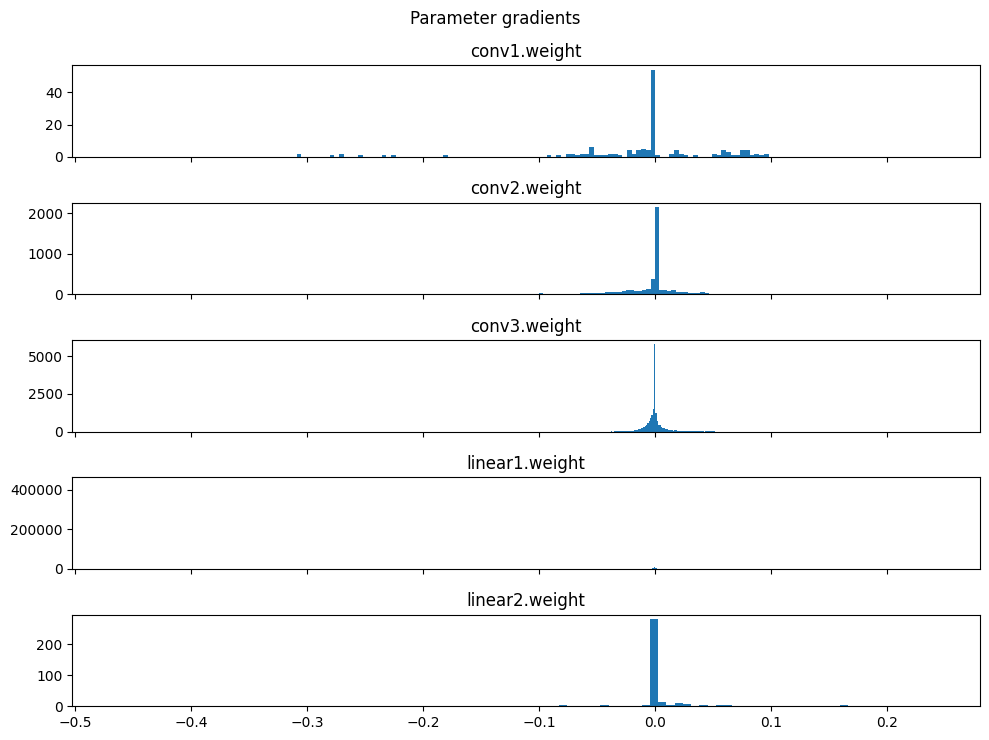

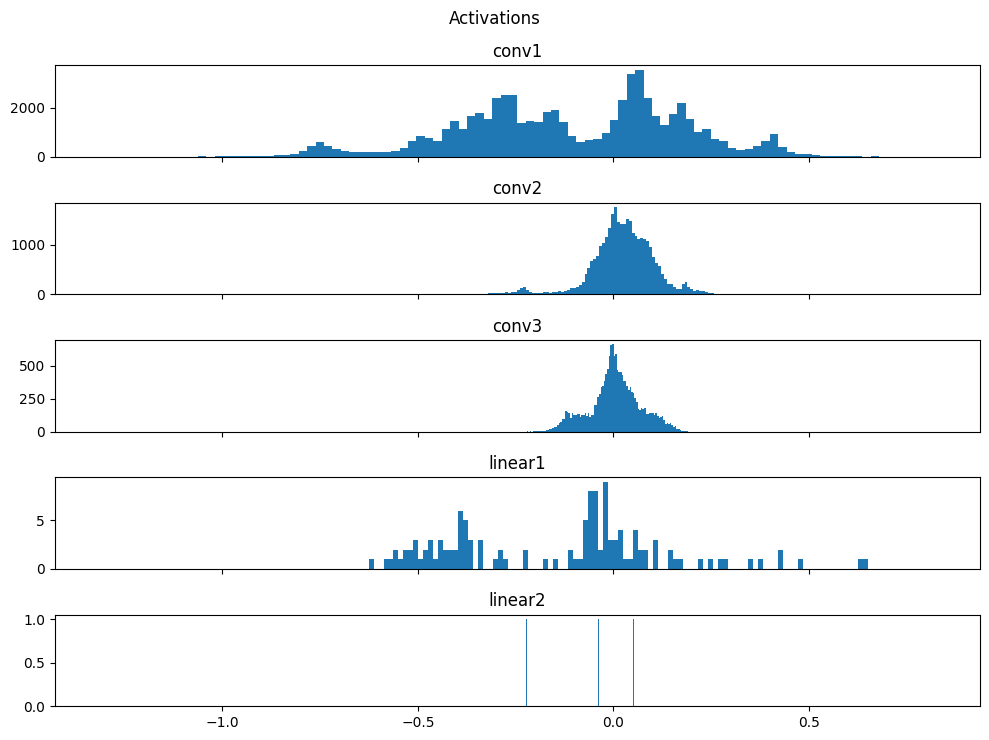

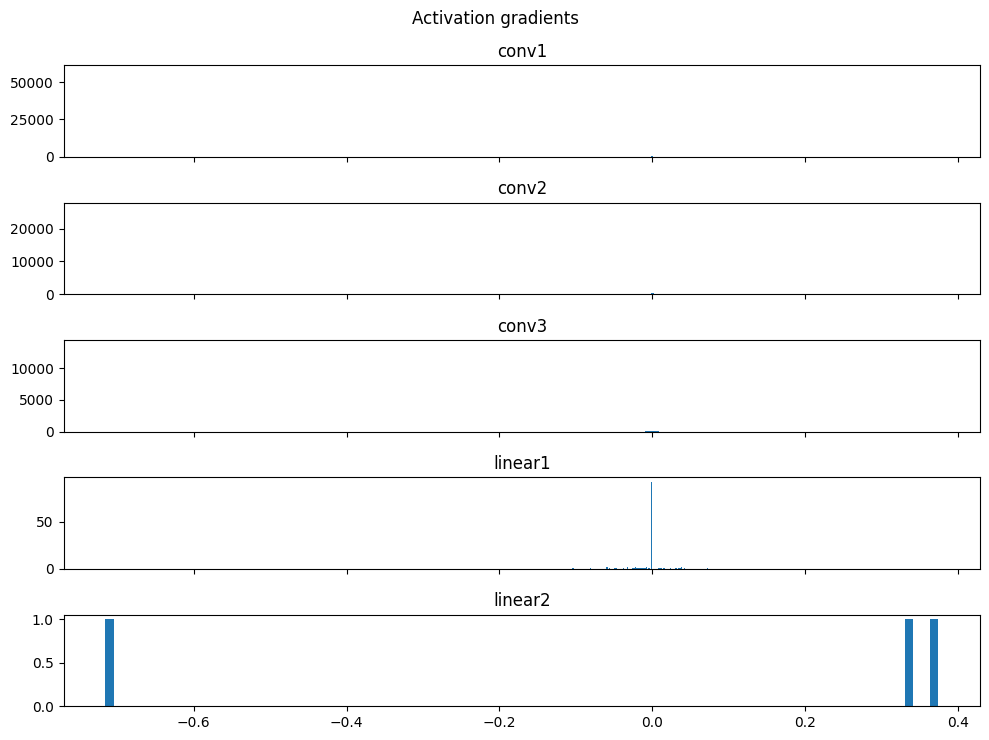

epoch: 1/20 | train loss=1.0302, train_acc=0.4333 | val loss: 0.9543, val_acc=0.4833
epoch: 2/20 | train loss=0.8047, train_acc=0.6027 | val loss: 0.9337, val_acc=0.5067


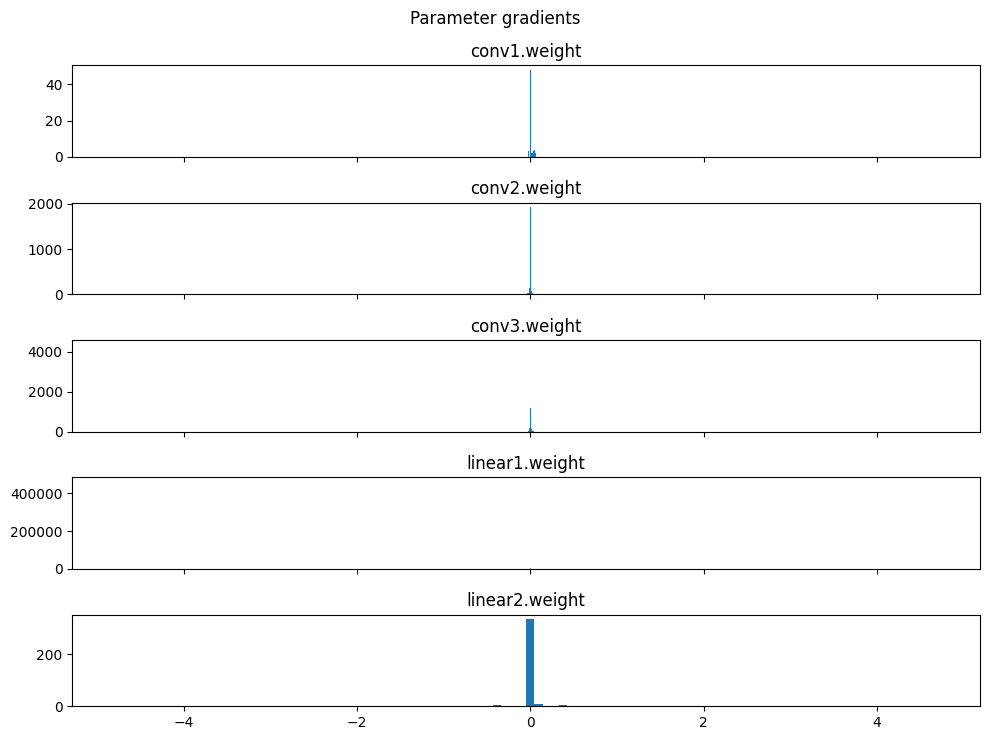

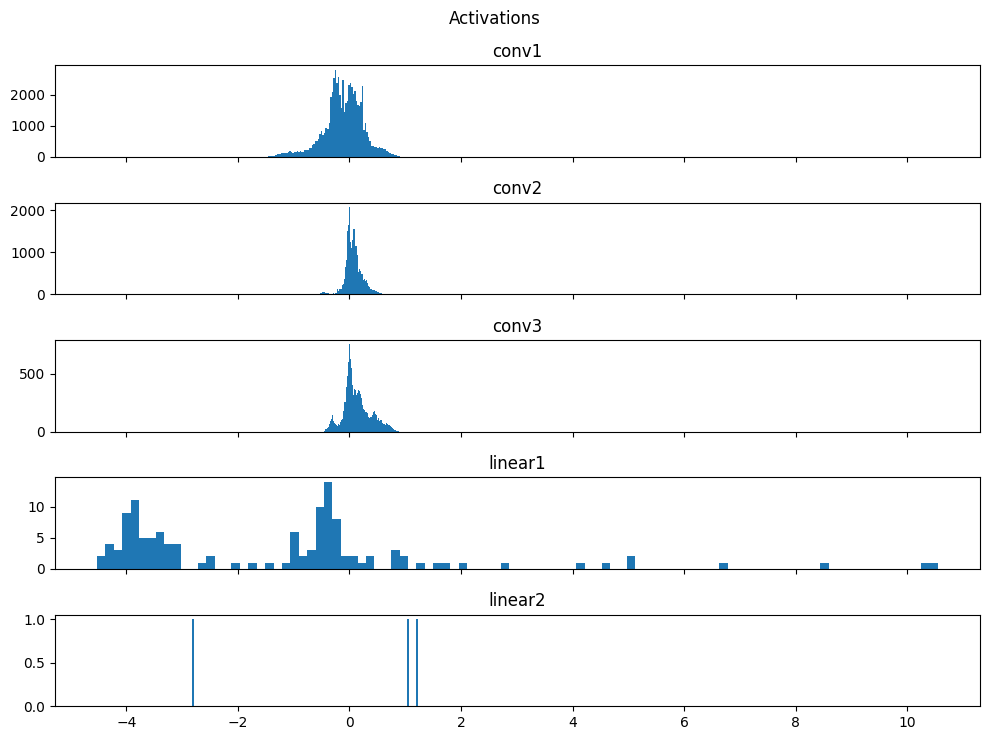

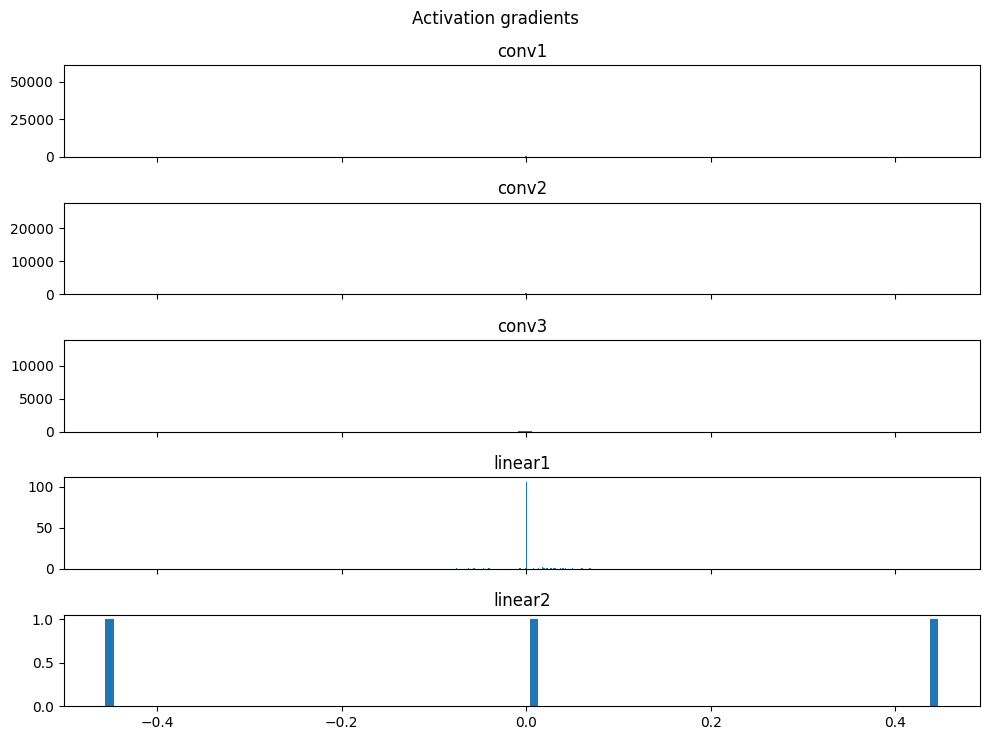

epoch: 3/20 | train loss=0.7210, train_acc=0.6307 | val loss: 0.7491, val_acc=0.7467
epoch: 4/20 | train loss=0.6839, train_acc=0.6880 | val loss: 0.7290, val_acc=0.7367


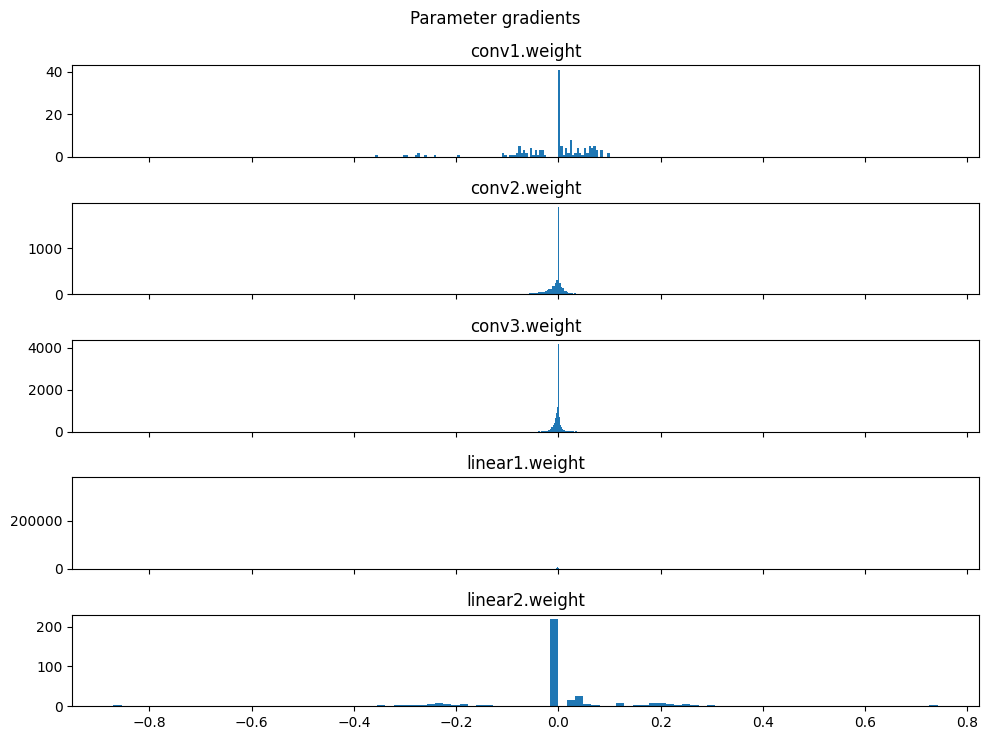

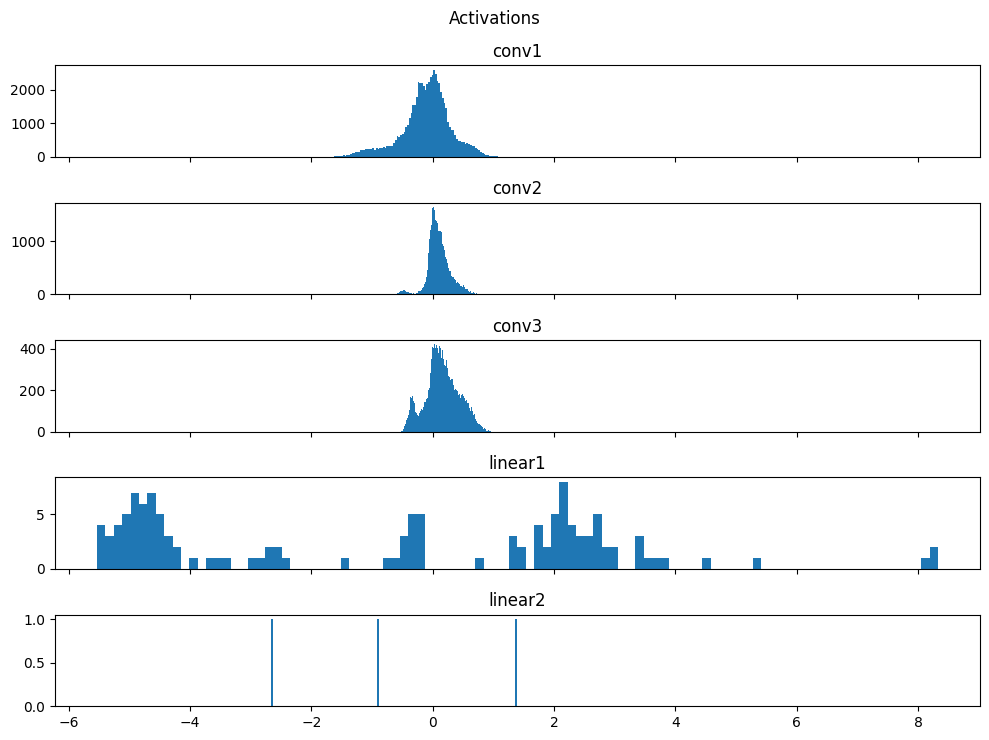

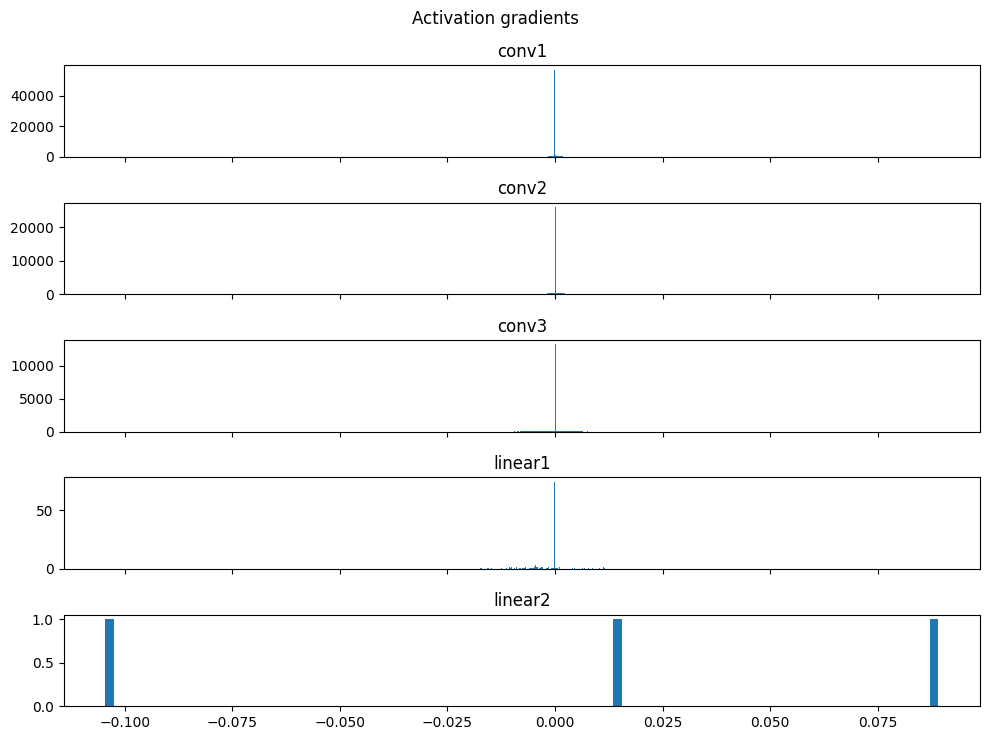

epoch: 5/20 | train loss=0.7124, train_acc=0.6687 | val loss: 0.7181, val_acc=0.5967
epoch: 6/20 | train loss=0.6916, train_acc=0.6613 | val loss: 0.7202, val_acc=0.6100


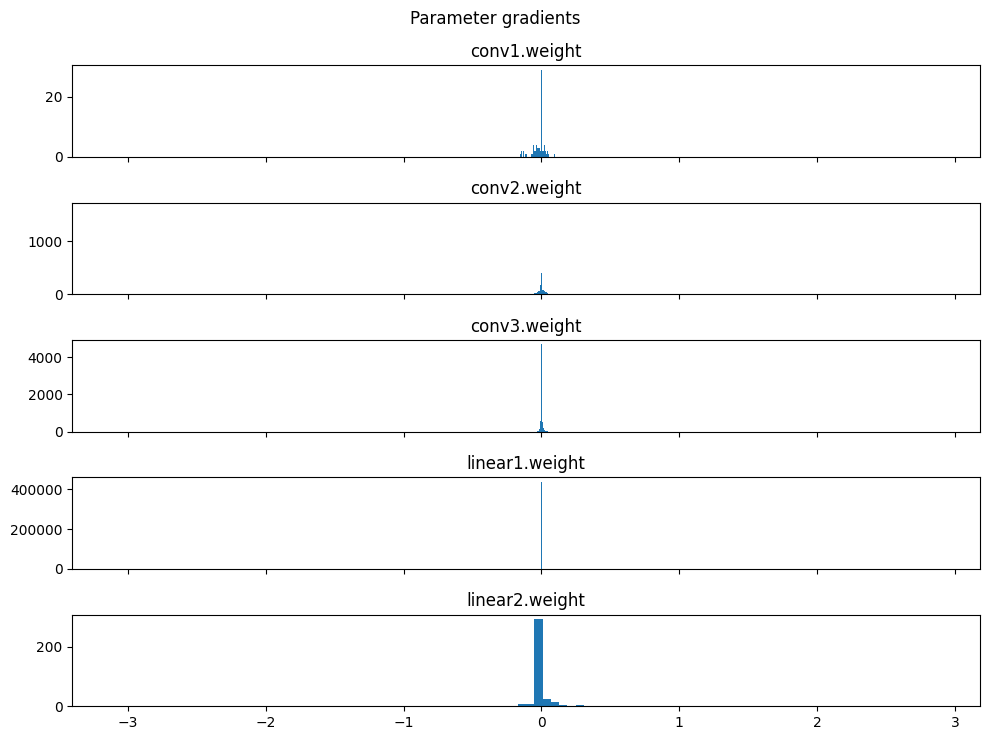

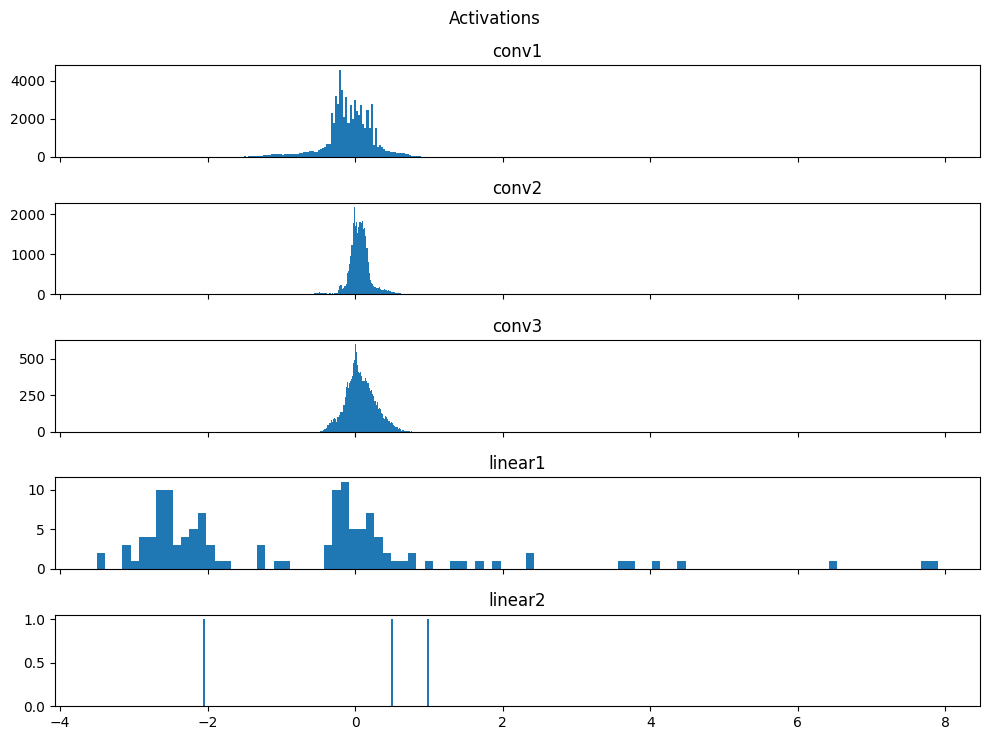

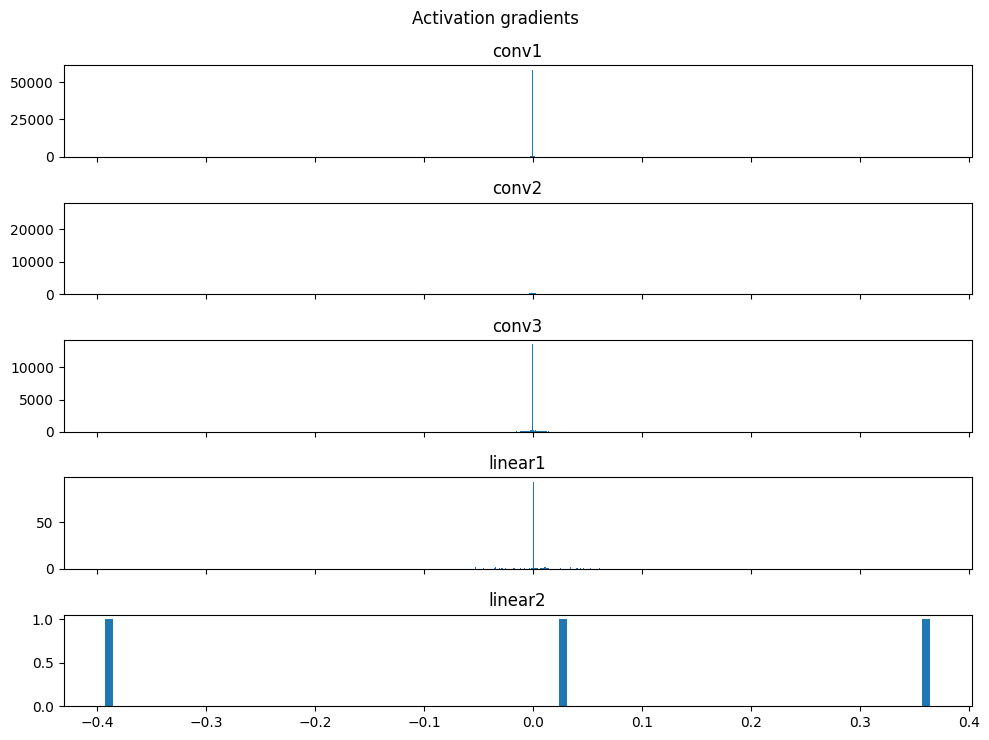

epoch: 7/20 | train loss=0.6537, train_acc=0.6740 | val loss: 0.5525, val_acc=0.8167
epoch: 8/20 | train loss=0.5806, train_acc=0.7307 | val loss: 0.5361, val_acc=0.8067


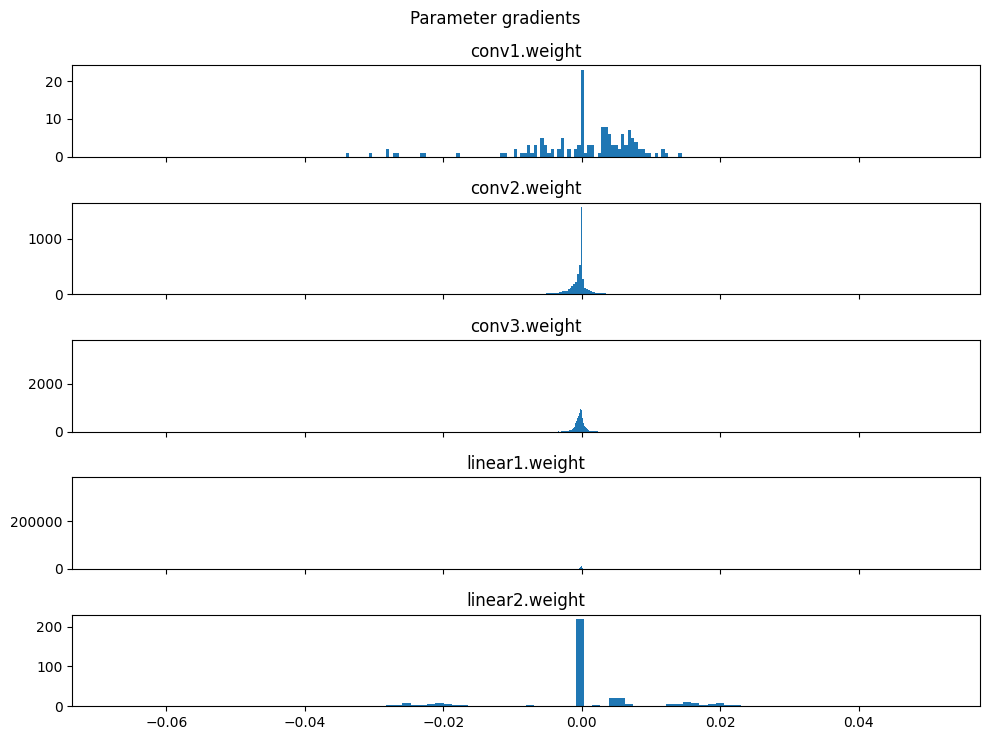

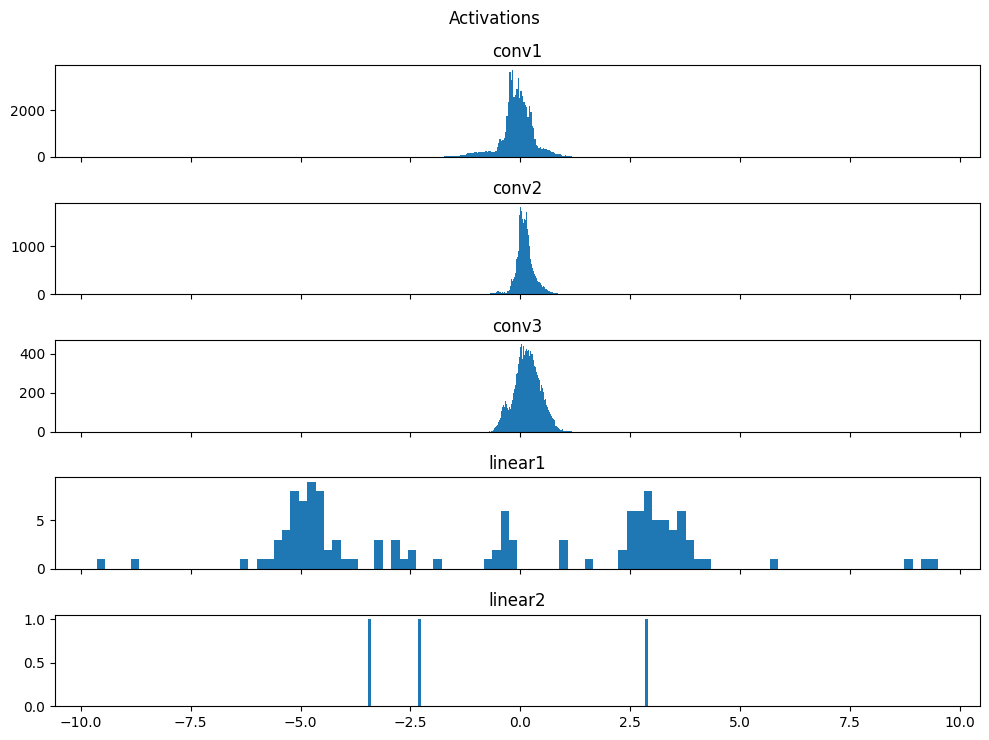

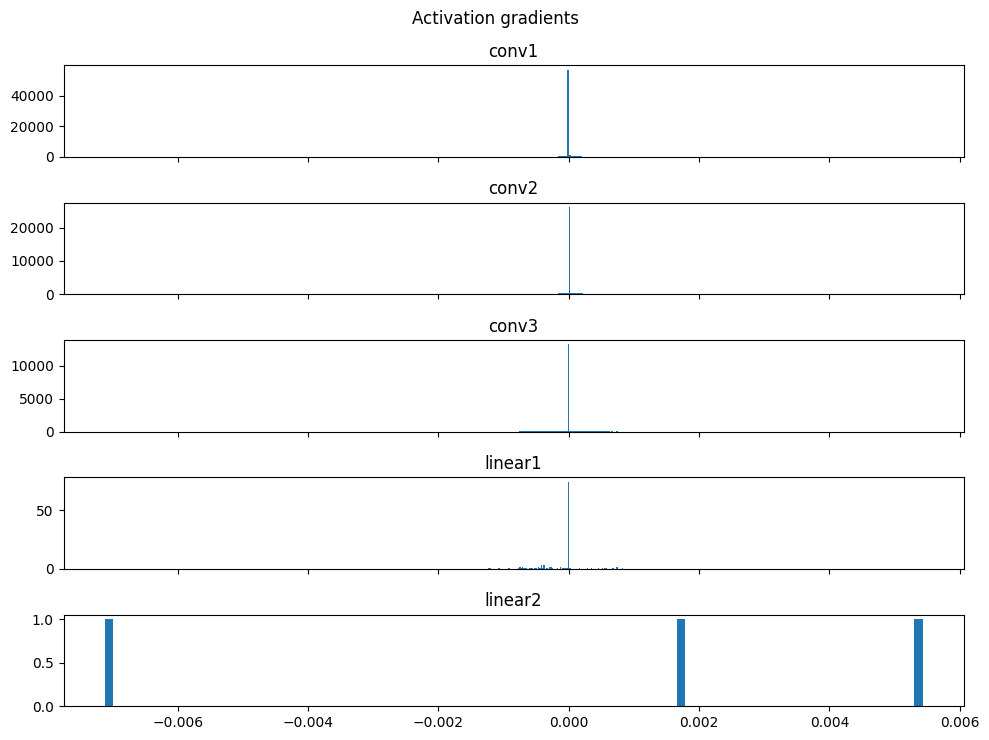

epoch: 9/20 | train loss=0.5532, train_acc=0.7613 | val loss: 0.5931, val_acc=0.7567
epoch: 10/20 | train loss=0.5090, train_acc=0.7920 | val loss: 0.5847, val_acc=0.7667


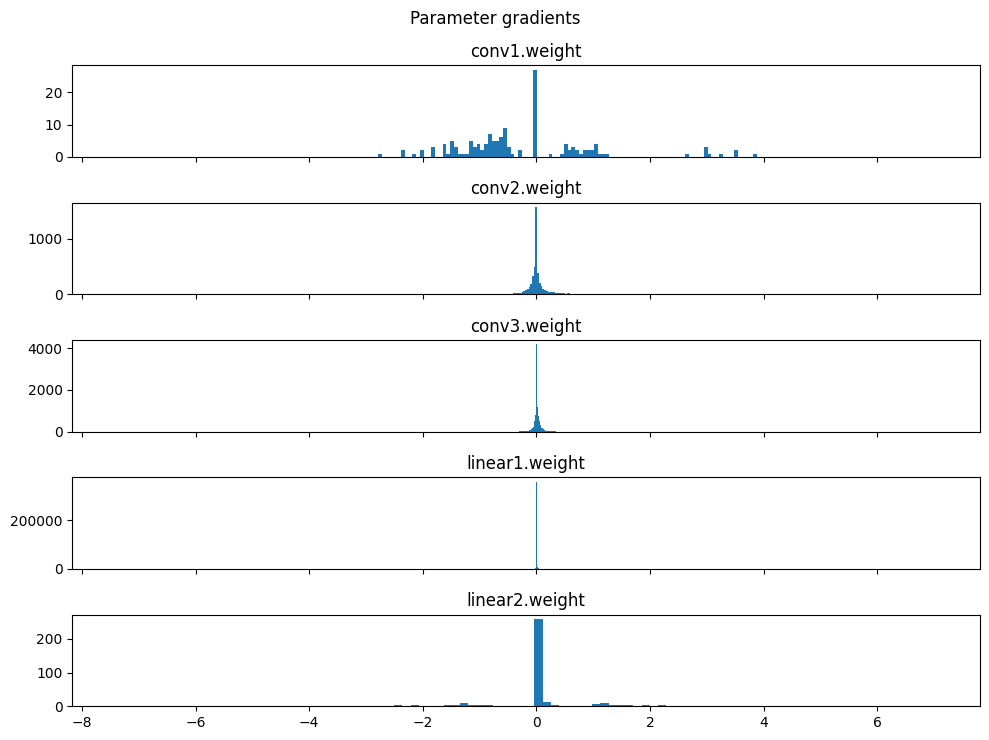

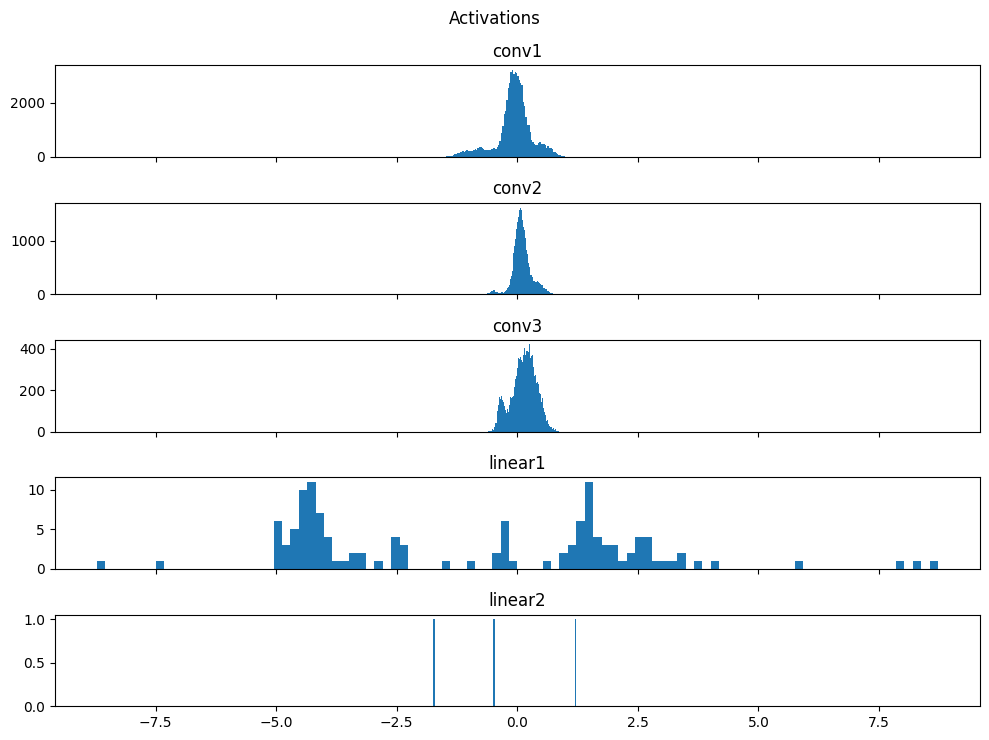

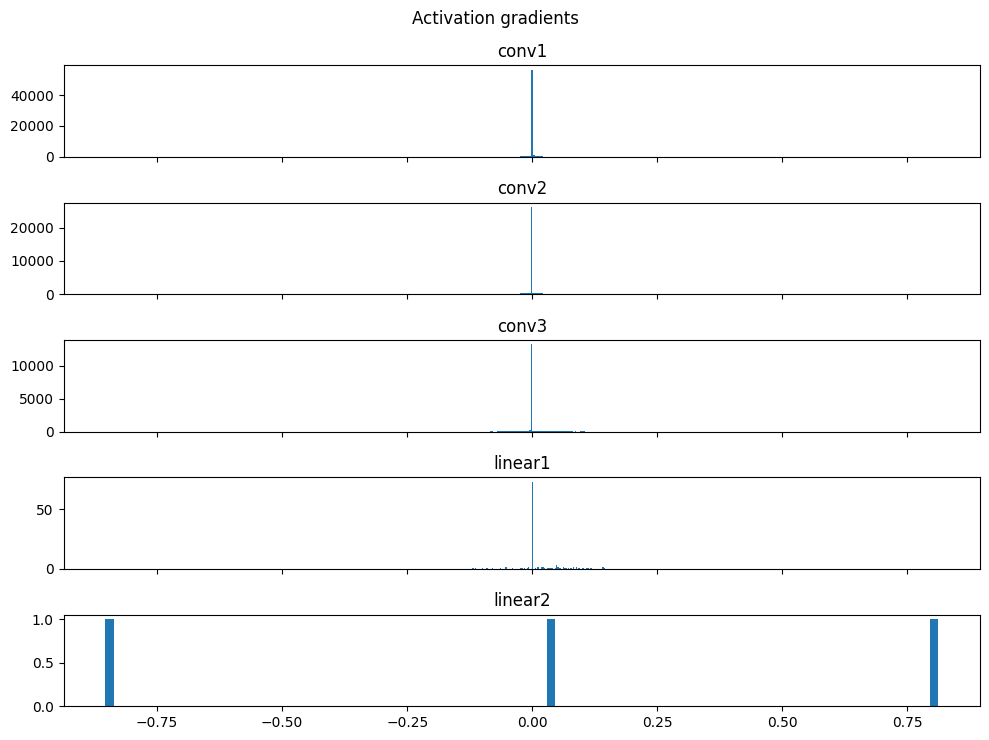

epoch: 11/20 | train loss=0.4927, train_acc=0.8000 | val loss: 0.4465, val_acc=0.8233
epoch: 12/20 | train loss=0.4440, train_acc=0.8273 | val loss: 0.6045, val_acc=0.7567


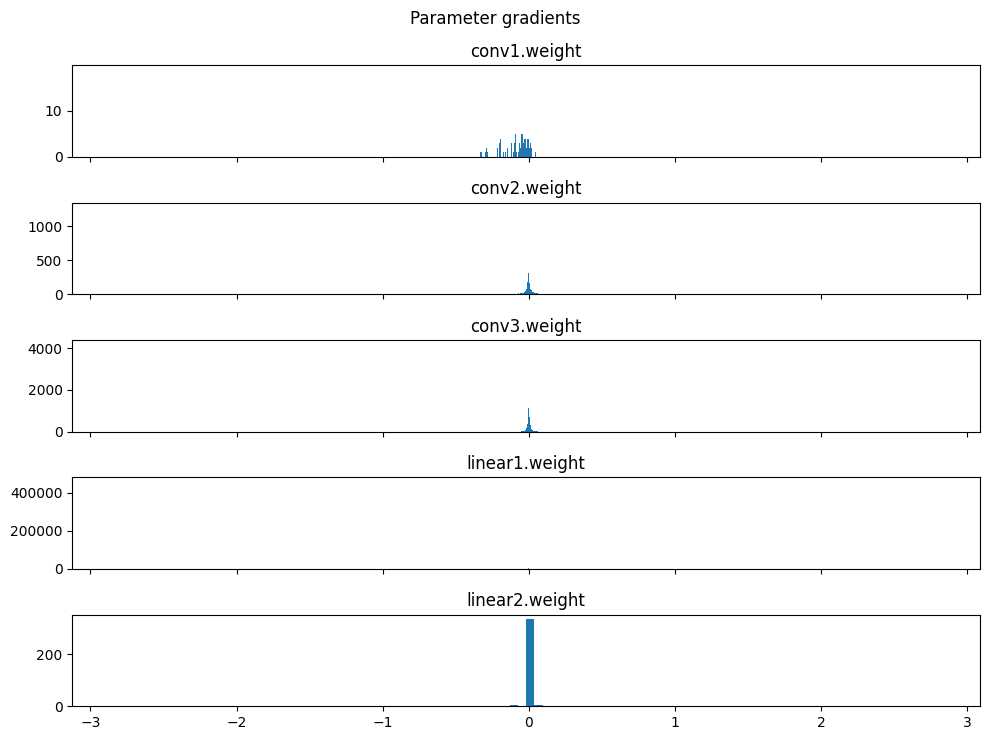

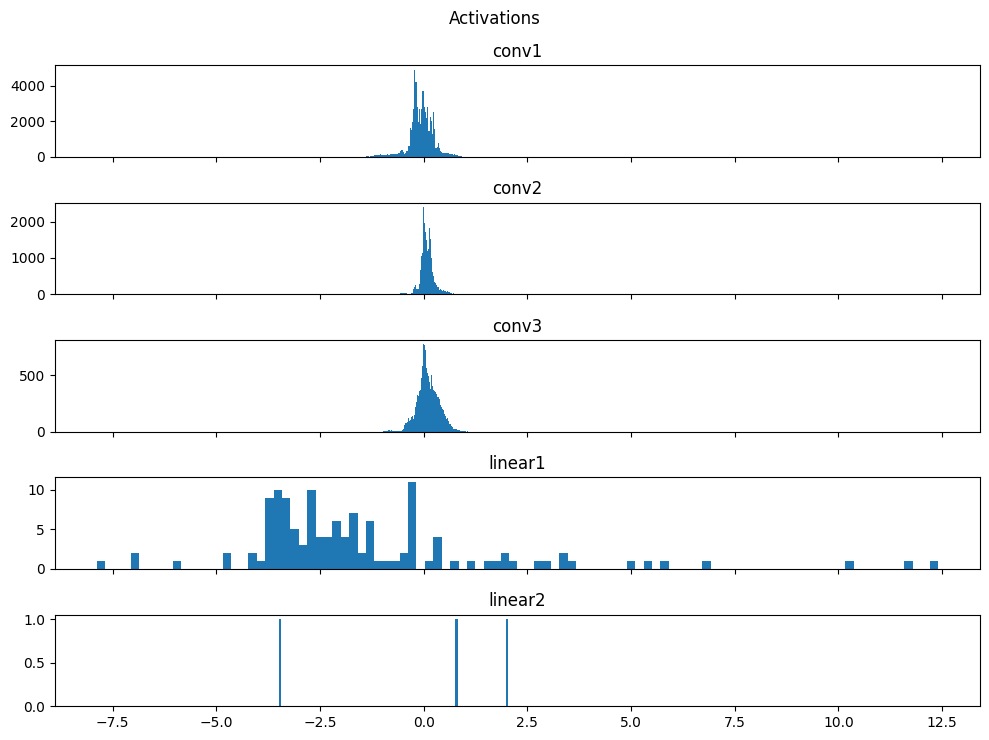

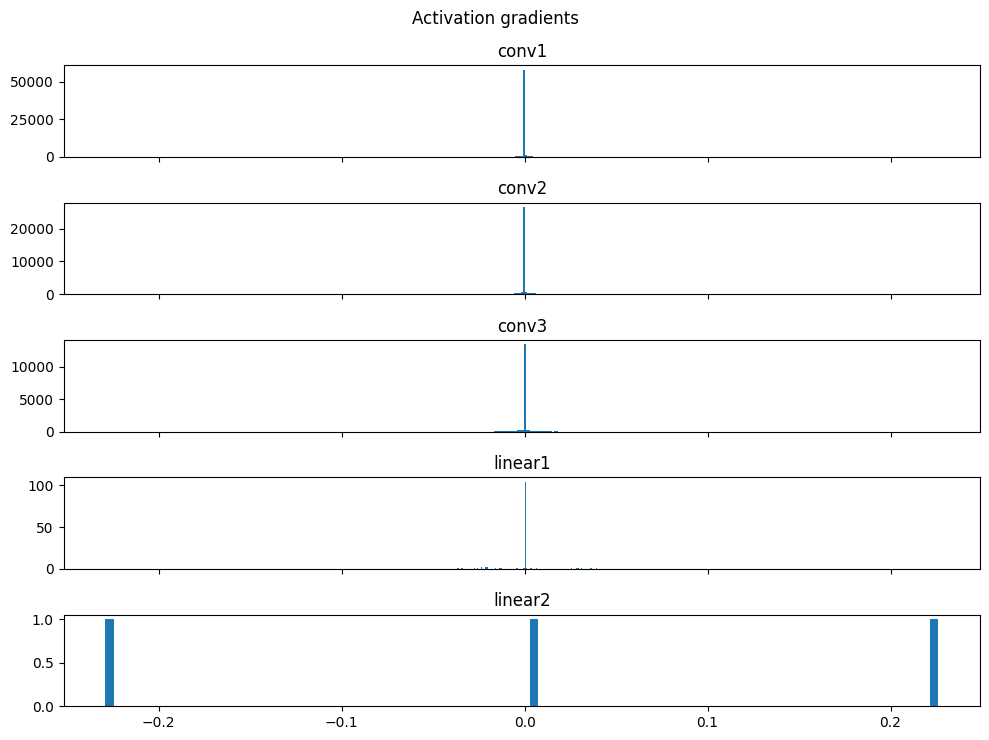

epoch: 13/20 | train loss=0.4001, train_acc=0.8413 | val loss: 0.6088, val_acc=0.7433


KeyboardInterrupt: 

In [7]:
# number of classes in the dataset
num_classes = len(balanced_adj_train_set.classes)

# create adjusted model
model = BrainTumorCNN(num_classes).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 20

training_losses = []
validation_losses = []
for epoch in range(epochs):
    plot_grads = True if epoch % 2 == 0 else False
    train_loss, train_acc = train_model(model, balanced_adj_train_loader, loss_fn, optimizer, plot_grads)
    training_losses.append(train_loss)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, balanced_adj_val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

In [ ]:
test_loss, test_acc, test_confusion_matrix = evaluate_model(
    model, balanced_adj_test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"{test_loss=}, {test_acc=}")
draw_confusion_matrix(test_confusion_matrix, balanced_adj_val_set, balanced_adj_train_set.classes)

Train and Evaluate Paper's Model

In [ ]:
# create train, validition, and test sets
balanced_pap_train_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/train',
    transform=paper_transform
)

balanced_pap_train_loader = torch.utils.data.DataLoader(
    balanced_pap_train_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

balanced_pap_val_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/validation',
    transform=paper_transform
)

balanced_pap_val_loader = torch.utils.data.DataLoader(
    balanced_pap_val_set,
    batch_size=128,
    shuffle=True,
    num_workers=0, 
    pin_memory=True,
)

balanced_pap_test_set = torchvision.datasets.ImageFolder(
    'balanced_data/tumor_only/test',
    transform=paper_transform
)

balanced_pap_test_loader = torch.utils.data.DataLoader(
    balanced_pap_test_set,
    batch_size=128,
    shuffle=True,
    num_workers=0,  
    pin_memory=True,
)

In [ ]:
# paper's model
model = BrainTumorCLF(3).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 10

training_losses = []
validation_losses = []
for epoch in range(epochs):
    train_loss, train_acc = train_model(model, balanced_pap_train_loader, loss_fn, optimizer)
    training_losses.append(train_loss)
    val_loss, val_acc, val_precision, val_recall = evaluate_model(model, balanced_pap_val_loader, loss_fn, device)
    validation_losses.append(val_loss)
    print(
        f"epoch: {epoch+1}/{epochs} | train loss={np.mean(train_loss):.4f}, {train_acc=:.4f} | val loss: {np.mean(val_loss):.4f}, {val_acc=:.4f}"
    )

In [ ]:
test_loss, test_acc, test_precision, test_recall, test_confusion_matrix = evaluate_model(
    model, balanced_pap_test_loader, loss_fn, device, return_confusion_matrix=True
)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

confusion_matrix = draw_confusion_matrix(test_confusion_matrix, balanced_pap_val_set, balanced_pap_train_set.classes)